## Predicción en datos de caballos

La información relevante sobre la tabla se encuentra en este [link](https://archive-beta.ics.uci.edu/ml/datasets/horse+colic).

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PROJECT_DIR = "../data/raw/"
col_names = [
    'surgery', 'age', 'hospital_number',
    'r_temperature', 'pulse', 'resp_rate',
    'ext_temperature', 'per_pulse', 'muc_membraes',
    'cap_ref_time', 'pain', 'peristalsis', 'abd_distension',
    'naso_tub', 'naso_reflux', 'naso_reflux_ph', 'rect_exam', 'abdomen',
    'pack_cell_vol', 'protein', 'abd_appearance', 'abd_protein', 'outcome',
    'surgical_lesion', 'type_lesion_1', 'type_lesion_2', 'type_lesion_3', 'cp_data', 'extra'
]
df = pd.read_csv(PROJECT_DIR + 'horse-colic.data', sep= ' ', names=col_names, na_values = ['?'])
df.head()

,surgery,age,hospital_number,r_temperature,pulse,resp_rate,ext_temperature,per_pulse,muc_membraes,cap_ref_time,...,protein,abd_appearance,abd_protein,outcome,surgical_lesion,type_lesion_1,type_lesion_2,type_lesion_3,cp_data,extra
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,8.4,NaN,NaN,2.0,2,11300,0,0,2,NaN
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,85.0,2.0,2.0,3.0,2,2208,0,0,2,NaN
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,6.7,NaN,NaN,1.0,2,0,0,0,1,NaN
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,7.2,3.0,5.3,2.0,1,2208,0,0,1,NaN
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,7.4,NaN,NaN,2.0,2,4300,0,0,2,NaN


In [4]:
df.shape

(300, 29)

In [5]:
df.describe()

,surgery,age,hospital_number,r_temperature,pulse,resp_rate,ext_temperature,per_pulse,muc_membraes,cap_ref_time,...,protein,abd_appearance,abd_protein,outcome,surgical_lesion,type_lesion_1,type_lesion_2,type_lesion_3,cp_data,extra
count,299.000000,300.000000,3.000000e+02,240.000000,276.000000,242.000000,244.000000,231.000000,253.000000,268.000000,...,267.000000,135.000000,102.000000,299.000000,300.000000,300.000000,300.000000,300.000000,300.000000,0.0
mean,1.397993,1.640000,1.085889e+06,38.167917,71.913043,30.417355,2.348361,2.017316,2.853755,1.305970,...,24.456929,2.037037,3.019608,1.551839,1.363333,3657.880000,90.226667,7.363333,1.670000,NaN
std,0.490305,2.173972,1.529801e+06,0.732289,28.630557,17.642231,1.045054,1.042428,1.620294,0.477629,...,27.475009,0.804905,1.968567,0.737187,0.481763,5399.513513,649.569234,127.536674,0.470998,NaN
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,3.300000,1.000000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,1.000000,1.000000,5.289040e+05,37.800000,48.000000,18.500000,1.000000,1.000000,1.000000,1.000000,...,6.500000,1.000000,2.000000,1.000000,1.000000,2111.750000,0.000000,0.000000,1.000000,NaN
50%,1.000000,1.000000,5.303055e+05,38.200000,64.000000,24.500000,3.000000,2.000000,3.000000,1.000000,...,7.500000,2.000000,2.250000,1.000000,1.000000,2673.500000,0.000000,0.000000,2.000000,NaN
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000,2.000000,...,57.000000,3.000000,3.900000,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000,NaN
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,...,89.000000,3.000000,10.100000,3.000000,2.000000,41110.000000,7111.000000,2209.000000,2.000000,NaN


In [6]:
df.dtypes

surgery            float64
age                  int64
hospital_number      int64
r_temperature      float64
pulse              float64
resp_rate          float64
ext_temperature    float64
per_pulse          float64
muc_membraes       float64
cap_ref_time       float64
pain               float64
peristalsis        float64
abd_distension     float64
naso_tub           float64
naso_reflux        float64
naso_reflux_ph     float64
rect_exam          float64
abdomen            float64
pack_cell_vol      float64
protein            float64
abd_appearance     float64
abd_protein        float64
outcome            float64
surgical_lesion      int64
type_lesion_1        int64
type_lesion_2        int64
type_lesion_3        int64
cp_data              int64
extra              float64
dtype: object

In [7]:
df['surgery'].unique()

array([ 2.,  1., nan])

In [8]:
df[['surgery']].value_counts()

surgery
1.0        180
2.0        119
dtype: int64

In [9]:
df['surgery'] = df['surgery'].where(df['surgery'] != '?', other = np.nan)

In [10]:
df['surgery'].unique()

array([ 2.,  1., nan])

In [11]:
df['age'].unique()

array([1, 9])

In [12]:
df[['age']].value_counts()

age
1      276
9       24
dtype: int64

In [13]:
df['age'] = df[['age']].applymap(lambda x: 'Adult' if x== 1 else 'Young')

In [14]:
df[['age']].value_counts(normalize = True)

age  
Adult    0.92
Young    0.08
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Percent'>

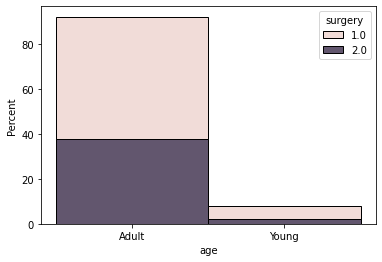

In [15]:
sns.histplot(data = df, x = 'age', stat = 'percent', hue = 'surgery', multiple = 'stack')
#element = 'poly'

In [16]:
df.dtypes

surgery            float64
age                 object
hospital_number      int64
r_temperature      float64
pulse              float64
resp_rate          float64
ext_temperature    float64
per_pulse          float64
muc_membraes       float64
cap_ref_time       float64
pain               float64
peristalsis        float64
abd_distension     float64
naso_tub           float64
naso_reflux        float64
naso_reflux_ph     float64
rect_exam          float64
abdomen            float64
pack_cell_vol      float64
protein            float64
abd_appearance     float64
abd_protein        float64
outcome            float64
surgical_lesion      int64
type_lesion_1        int64
type_lesion_2        int64
type_lesion_3        int64
cp_data              int64
extra              float64
dtype: object

In [17]:
df['r_temperature'].unique()

array([38.5, 39.2, 38.3, 39.1, 37.3,  nan, 37.9, 38.1, 37.2, 38. , 38.2,
       37.6, 37.5, 39.4, 39.9, 38.4, 38.6, 37.8, 37.7, 39. , 35.4, 38.9,
       37.4, 40.3, 37. , 39.7, 38.7, 36.4, 38.8, 39.6, 36.8, 39.5, 36.5,
       36. , 37.1, 39.3, 36.1, 36.6, 40.8, 36.9, 40. ])

In [18]:
df['r_temperature'] = df['r_temperature'].where(df['r_temperature'] != '?', other = np.nan)

In [19]:
df['r_temperature'].unique()

array([38.5, 39.2, 38.3, 39.1, 37.3,  nan, 37.9, 38.1, 37.2, 38. , 38.2,
       37.6, 37.5, 39.4, 39.9, 38.4, 38.6, 37.8, 37.7, 39. , 35.4, 38.9,
       37.4, 40.3, 37. , 39.7, 38.7, 36.4, 38.8, 39.6, 36.8, 39.5, 36.5,
       36. , 37.1, 39.3, 36.1, 36.6, 40.8, 36.9, 40. ])

In [20]:
df[['r_temperature']].value_counts()

r_temperature
38.0             26
38.5             19
38.3             18
37.8             17
38.2             16
38.6             12
37.5             12
38.1             12
38.4             11
37.9              7
38.7              7
37.6              7
37.7              7
37.2              7
37.3              6
38.8              6
39.2              5
39.0              4
39.5              4
38.9              4
39.3              4
37.4              3
39.4              3
37.1              3
39.1              2
36.5              2
40.3              2
37.0              2
40.0              1
39.7              1
39.6              1
39.9              1
35.4              1
36.0              1
36.9              1
36.8              1
36.6              1
36.4              1
36.1              1
40.8              1
dtype: int64

In [21]:
typos_col = {
    'r_temperature': 'float64'
}

In [22]:
df = df.astype(typos_col)

<AxesSubplot:ylabel='Frequency'>

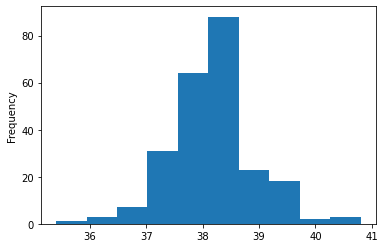

In [23]:
df['r_temperature'].plot(kind = 'hist')

<AxesSubplot:xlabel='r_temperature', ylabel='Percent'>

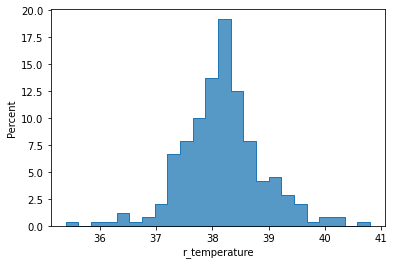

In [24]:
sns.histplot(data = df, x = 'r_temperature', stat = 'percent', element = 'step')

<AxesSubplot:>

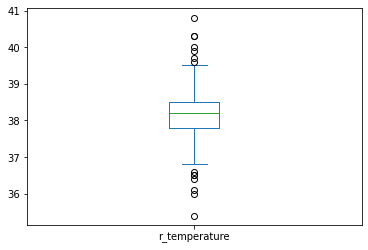

In [25]:
df['r_temperature'].plot(kind = 'box')

<AxesSubplot:xlabel='r_temperature', ylabel='age'>

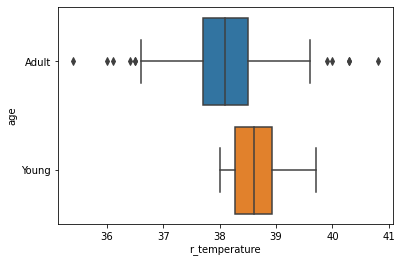

In [26]:
sns.boxplot(data = df, x = 'r_temperature', y = 'age')

In [27]:
df['pulse'].unique()

array([ 66.,  88.,  40., 164., 104.,  nan,  48.,  60.,  80.,  90.,  72.,
        42.,  92.,  76.,  96., 128.,  64., 110., 130., 108., 100., 112.,
        52., 146., 150., 120., 140.,  84.,  46., 114., 160.,  54.,  56.,
        38.,  98.,  50.,  44.,  70.,  78.,  49.,  30., 136., 132.,  65.,
        86., 129.,  68.,  36.,  45., 124., 184.,  75.,  82.])

In [28]:
df['pulse'] = df['pulse'].where(df['pulse'] != '?', other = np.nan)

In [29]:
#aquí no lo puedo poner en int64 porque cuando entra a Nan no le gusta.
typos_col = {
    'pulse': 'float64'
}

In [30]:
df = df.astype(typos_col)

In [31]:
df.dtypes

surgery            float64
age                 object
hospital_number      int64
r_temperature      float64
pulse              float64
resp_rate          float64
ext_temperature    float64
per_pulse          float64
muc_membraes       float64
cap_ref_time       float64
pain               float64
peristalsis        float64
abd_distension     float64
naso_tub           float64
naso_reflux        float64
naso_reflux_ph     float64
rect_exam          float64
abdomen            float64
pack_cell_vol      float64
protein            float64
abd_appearance     float64
abd_protein        float64
outcome            float64
surgical_lesion      int64
type_lesion_1        int64
type_lesion_2        int64
type_lesion_3        int64
cp_data              int64
extra              float64
dtype: object

<AxesSubplot:ylabel='Frequency'>

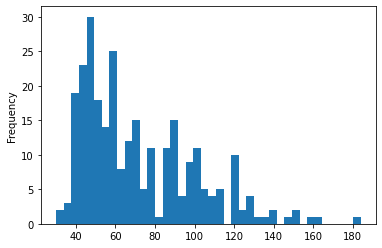

In [32]:
#yo creo que ese 180 es un dato atípico aunque dice que el caballo podría tener lesiones
df['pulse'].plot(kind = 'hist', bins = 40)

<AxesSubplot:xlabel='pulse', ylabel='Percent'>

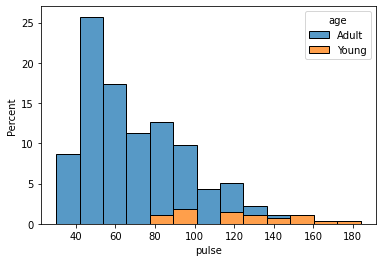

In [33]:
sns.histplot(data = df, x = 'pulse', stat = 'percent', hue = 'age', multiple = 'stack')

<AxesSubplot:>

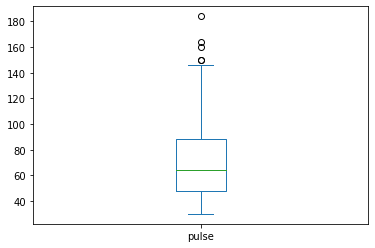

In [34]:
df['pulse'].plot(kind = 'box')

<AxesSubplot:xlabel='pulse', ylabel='age'>

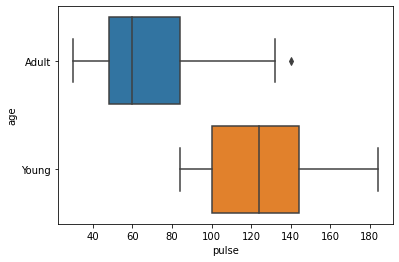

In [35]:
sns.boxplot(data = df, x = 'pulse', y = 'age')

In [36]:
df['resp_rate'].unique()

array([28., 20., 24., 84., 35., nan, 16., 36., 12., 52., 48., 21., 60.,
       34., 42., 30., 96., 72., 15., 44., 32., 22., 18., 80., 40., 10.,
       51., 68., 66.,  9., 14., 90.,  8., 23., 58., 13., 70., 26., 88.,
       25., 50.])

In [37]:
df['resp_rate'] = df['resp_rate'].where(df['resp_rate'] != '?', other = np.nan)

In [38]:
df[['resp_rate']].value_counts()

resp_rate
20.0         28
24.0         27
16.0         22
12.0         19
30.0         19
40.0         17
36.0         16
28.0         13
32.0         11
18.0          8
48.0          6
60.0          4
14.0          4
35.0          3
68.0          3
44.0          3
80.0          3
10.0          3
42.0          3
51.0          2
70.0          2
50.0          2
84.0          2
90.0          2
96.0          2
9.0           2
22.0          2
21.0          2
34.0          1
26.0          1
52.0          1
58.0          1
25.0          1
66.0          1
23.0          1
72.0          1
15.0          1
88.0          1
13.0          1
8.0           1
dtype: int64

In [39]:
typos_col = {
    'resp_rate': 'float64'
}

In [40]:
df = df.astype(typos_col)

In [41]:
df[['resp_rate']].value_counts()

resp_rate
20.0         28
24.0         27
16.0         22
12.0         19
30.0         19
40.0         17
36.0         16
28.0         13
32.0         11
18.0          8
48.0          6
60.0          4
14.0          4
35.0          3
68.0          3
44.0          3
80.0          3
10.0          3
42.0          3
51.0          2
70.0          2
50.0          2
84.0          2
90.0          2
96.0          2
9.0           2
22.0          2
21.0          2
34.0          1
26.0          1
52.0          1
58.0          1
25.0          1
66.0          1
23.0          1
72.0          1
15.0          1
88.0          1
13.0          1
8.0           1
dtype: int64

<AxesSubplot:ylabel='Frequency'>

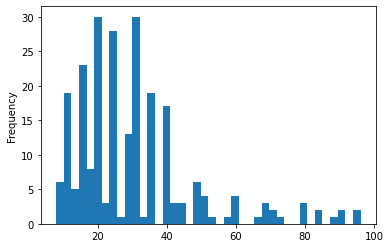

In [42]:
#y aquí que putas, si lo normal es entre 8 a 10 ????
df['resp_rate'].plot(kind = 'hist', bins = 40)

<AxesSubplot:>

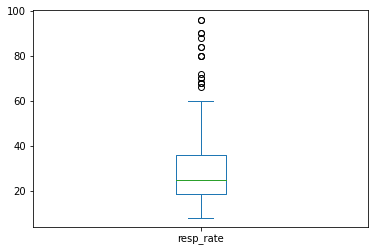

In [43]:
df['resp_rate'].plot(kind = 'box')

In [44]:
df['ext_temperature'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [45]:
df[['ext_temperature']].value_counts()

ext_temperature
3.0                109
1.0                 78
2.0                 30
4.0                 27
dtype: int64

In [46]:
ext_temp_dict = {
    '1': 'normal',
    '2': 'warm',
    '3': 'cool',
    '4': 'cold',
}

In [47]:
df['ext_temperature'] = df['ext_temperature'].map(ext_temp_dict)

In [48]:
df['ext_temperature'].unique()

array([nan], dtype=object)

In [49]:
df[['ext_temperature']].value_counts(dropna = False)

ext_temperature
NaN                300
dtype: int64

In [50]:
df['per_pulse'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [51]:
per_dict = {
    '1':  'normal',
    '2': 'increased',
    '3': 'reduced',
    '4': 'absent',
}

In [52]:
df['per_pulse'] = df['per_pulse'].map(per_dict)

In [53]:
df['per_pulse'].unique()

array([nan], dtype=object)

In [54]:
df[['per_pulse']].value_counts()

Series([], dtype: int64)

In [55]:
df['muc_membraes'].unique()

array([nan,  4.,  3.,  6.,  1.,  5.,  2.])

In [56]:
def mucosa(value):
    if value == '1' or value == '2':
        return 'normal'
    if value == '3':
        return 'early chock'
    if value == '4' or value == '6':
        return 'serious circulatory compromise'
    if value == '5':
        return 'septicemia'
    if value == '?':
        return np.nan

In [57]:
df['extra-muc_membraes'] = df[['muc_membraes']].applymap(mucosa)

In [58]:
df[['muc_membraes']].value_counts()

muc_membraes
1.0             79
3.0             58
4.0             41
2.0             30
5.0             25
6.0             20
dtype: int64

In [59]:
df[['extra-muc_membraes']].value_counts()

Series([], dtype: int64)

In [60]:
#se supone que este valor sólo debería ser 1 y 2, y aquí qué?
df['cap_ref_time'].unique()

array([ 2.,  1., nan,  3.])

In [61]:
df[['cap_ref_time']].value_counts()

cap_ref_time
1.0             188
2.0              78
3.0               2
dtype: int64

In [62]:
df['cap_ref_time'] = df['cap_ref_time'].where(df['cap_ref_time'] != '?', other = np.nan)

In [63]:
df[['cap_ref_time']].value_counts()

cap_ref_time
1.0             188
2.0              78
3.0               2
dtype: int64

In [64]:
typos_col = {
    'cap_ref_time': 'float64'
}

In [65]:
df = df.astype(typos_col)

<AxesSubplot:ylabel='Frequency'>

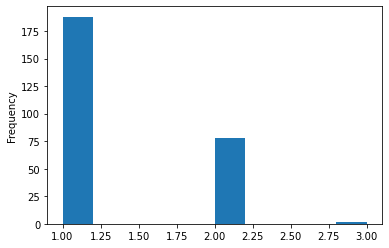

In [67]:
#el 3 es un dato atípico alguien se equivocó poniendo los datos
df['cap_ref_time'].plot(kind = 'hist')

In [68]:
df['pain'].unique()

array([ 5.,  3.,  2., nan,  4.,  1.])

In [69]:
df[['pain']].value_counts()

pain
3.0     67
2.0     59
5.0     42
4.0     39
1.0     38
dtype: int64

In [70]:
pain_dict = {
     '1': 'alert, no pain',
     '2': 'depressed',
     '3': 'intermittent mild pain',
     '4': 'intermittent severe pain',
     '5': 'continuous severe pain',
}

In [71]:
df['pain'] = df['pain'].map(pain_dict)

In [72]:
df[['pain']].value_counts()

Series([], dtype: int64)

In [73]:
df['peristalsis'].unique()

array([ 4.,  3., nan,  1.,  2.])

In [75]:
#   1 = hypermotile
#   2 = normal
#   3 = hypomotile
#   4 = absent
df[['peristalsis']].value_counts()

peristalsis
3.0            128
4.0             73
1.0             39
2.0             16
dtype: int64

In [76]:
df['peristalsis'] = df['peristalsis'].where(df['peristalsis'] != '?', other = np.nan)

In [77]:
df[['peristalsis']].value_counts()

peristalsis
3.0            128
4.0             73
1.0             39
2.0             16
dtype: int64

In [78]:
df['abd_distension'].unique()

array([ 4.,  2.,  1., nan,  3.])

In [79]:
#               1 = none
#               2 = slight
#               3 = moderate
#               4 = severe
df['abd_distension'].value_counts()

1.0    76
2.0    65
3.0    65
4.0    38
Name: abd_distension, dtype: int64

In [80]:
df['abd_distension'] = df['abd_distension'].where(df['abd_distension'] != '?', other = np.nan)

In [81]:
df['abd_distension'].value_counts()

1.0    76
2.0    65
3.0    65
4.0    38
Name: abd_distension, dtype: int64

In [82]:
df['naso_tub'].unique()

array([nan,  1.,  2.,  3.])

In [83]:
#               1 = none
#               2 = slight
#               3 = significant
df['naso_tub'].value_counts()

2.0    102
1.0     71
3.0     23
Name: naso_tub, dtype: int64

In [84]:
df['naso_tub'] = df['naso_tub'].where(df['naso_tub'] != '?', other = np.nan)

In [85]:
df['naso_reflux'].unique()

array([nan,  2.,  1.,  3.])

In [86]:
#               1 = none
#               2 = > 1 liter
#               3 = < 1 liter
df[['naso_reflux']].value_counts()

naso_reflux
1.0            120
3.0             39
2.0             35
dtype: int64

In [87]:
df['naso_reflux'] = df['naso_reflux'].where(df['naso_reflux'] != '?', other = np.nan)

In [88]:
df['naso_reflux_ph'].unique()

array([nan, 5. , 3. , 7.2, 4.5, 5.5, 2. , 4. , 6. , 7. , 1. , 5.7, 1.5,
       4.4, 6.5, 6.2, 4.3, 5.3, 7.5, 5.4, 3.5])

In [89]:
# 7 is neutral
#normal values are in the 3 to 4 range
df[['naso_reflux_ph']].value_counts()

naso_reflux_ph
2.0               9
7.0               8
6.5               5
5.0               4
5.5               4
3.0               3
4.0               3
4.5               3
1.0               2
7.5               2
1.5               1
5.4               1
4.4               1
5.7               1
6.0               1
6.2               1
4.3               1
3.5               1
7.2               1
5.3               1
dtype: int64

In [90]:
df['naso_reflux_ph'] = df['naso_reflux_ph'].where(df['naso_reflux_ph'] != '?', other = np.nan)

In [91]:
typos_col = {
    'naso_reflux_ph': 'float64'
}

In [92]:
df = df.astype(typos_col)

In [93]:
df[['naso_reflux_ph']].value_counts()

naso_reflux_ph
2.0               9
7.0               8
6.5               5
5.0               4
5.5               4
3.0               3
4.0               3
4.5               3
1.0               2
7.5               2
1.5               1
5.4               1
4.4               1
5.7               1
6.0               1
6.2               1
4.3               1
3.5               1
7.2               1
5.3               1
dtype: int64

<AxesSubplot:ylabel='Frequency'>

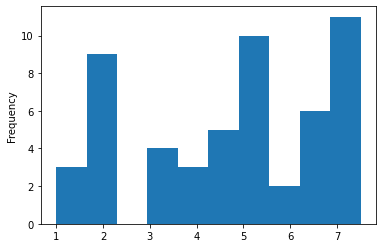

In [94]:
df['naso_reflux_ph'].plot(kind = 'hist')


<AxesSubplot:>

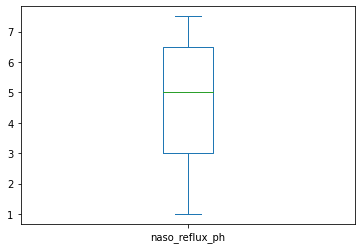

In [95]:
df['naso_reflux_ph'].plot(kind = 'box')

In [93]:
df['rect_exam'].unique()

array([ 3.,  4.,  1., nan,  2.])

In [94]:
#               1 = normal
#               2 = increased
#               3 = decreased
#               4 = absent
df[['rect_exam']].value_counts()

rect_exam
4.0          79
1.0          57
3.0          49
2.0          13
dtype: int64

In [95]:
df['rect_exam'] = df['rect_exam'].where(df['rect_exam'] != '?', other = np.nan)

In [96]:
df['abdomen'].unique()

array([ 5.,  2.,  1., nan,  3.,  4.])

In [97]:
#               1 = normal
#               2 = other
#               3 = firm feces in the large intestine
#               4 = distended small intestine
#               5 = distended large intestine
#          - 3 is probably an obstruction caused by a mechanical impaction
#            and is normally treated medically
#          - 4 and 5 indicate a surgical lesion
#Entonces aquí me pregunto, podemos hacer una variable dummy que me diga
#si el caballito tiene lesión quirugica y entonces estaría relacionado con el variable cirugía???
df[['abdomen']].value_counts()

abdomen
5.0        79
4.0        43
1.0        28
2.0        19
3.0        13
dtype: int64

In [98]:
df['abdomen'] = df['abdomen'].where(df['abdomen'] != '?', other = np.nan)

In [99]:
df[['abdomen']].value_counts()

abdomen
5.0        79
4.0        43
1.0        28
2.0        19
3.0        13
dtype: int64

In [100]:
df['pack_cell_vol'].unique()

array([45. , 50. , 33. , 48. , 74. ,  nan, 37. , 44. , 38. , 40. , 46. ,
       53. , 55. , 49. , 51. , 43. , 66. , 52. , 73. , 56. , 32. , 63. ,
       47. , 57. , 60. , 65. , 54. , 41. , 24. , 42. , 64. , 26. , 58. ,
       69. , 36. , 68. , 59. , 34. , 39. , 67. , 31. , 75. , 35. , 30. ,
       23. , 70. , 71. , 31.5, 72. , 37.5, 28. ])

In [101]:
df['pack_cell_vol'] = df['pack_cell_vol'].where(df['pack_cell_vol'] != '?', other = np.nan)

In [102]:
df['pack_cell_vol'].unique()

array([45. , 50. , 33. , 48. , 74. ,  nan, 37. , 44. , 38. , 40. , 46. ,
       53. , 55. , 49. , 51. , 43. , 66. , 52. , 73. , 56. , 32. , 63. ,
       47. , 57. , 60. , 65. , 54. , 41. , 24. , 42. , 64. , 26. , 58. ,
       69. , 36. , 68. , 59. , 34. , 39. , 67. , 31. , 75. , 35. , 30. ,
       23. , 70. , 71. , 31.5, 72. , 37.5, 28. ])

In [103]:
typos_col = {
    'pack_cell_vol': 'float64'
}

In [104]:
df = df.astype(typos_col)

<AxesSubplot:ylabel='Frequency'>

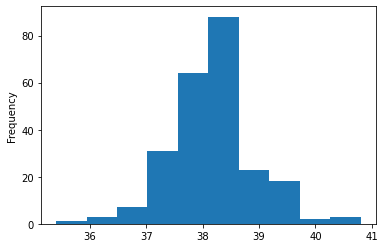

In [105]:
#normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated
df['r_temperature'].plot(kind = 'hist')

<AxesSubplot:>

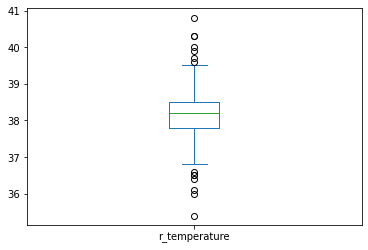

In [106]:
#aquí por ejemplo la gráfica de box no me dice mucho porque según los datos es normal un valor entre 30 y 50
df['r_temperature'].plot(kind = 'box')

In [107]:
df['protein'].unique()

array([ 8.4, 85. ,  6.7,  7.2,  7.4,  nan,  7. ,  8.3,  6.2,  6. ,  7.8,
        6.1, 81. ,  6.8,  8.7, 70. , 65. ,  5.5, 76. ,  7.5,  8.2,  6.6,
        8.6, 80. ,  6.5,  8.5, 67. , 69. ,  9.1,  7.7,  6.4,  8.1,  5.9,
        8. , 82. , 72. , 74. ,  6.3,  7.6,  4.9, 57. , 68. , 77. ,  8.9,
        5.7,  4.5, 61. , 86. , 60. , 66. ,  5.3,  7.3, 64. , 58. , 56. ,
       75. , 10.2, 62. ,  7.9, 73. , 71. , 63. , 46. ,  5.8, 53. ,  4.7,
       59. , 55. , 89. , 51. ,  4. , 11. ,  8.8, 50. , 54. ,  6.9,  4.6,
       13. ,  7.1,  3.3,  9. ,  5. ])

In [108]:
df[['protein']].value_counts()

protein
7.0        15
6.5        15
7.5        13
6.6        11
7.2         9
           ..
13.0        1
46.0        1
50.0        1
51.0        1
89.0        1
Length: 81, dtype: int64

In [109]:
#este dato está gonorreisima. porque se supone que debe estar entr 6 y 7.5 y hay algunos que no tienen punto decimal
df['protein'] = df['protein'].where(df['protein'] != '?', other = np.nan)

In [110]:
df['protein'].unique()

array([ 8.4, 85. ,  6.7,  7.2,  7.4,  nan,  7. ,  8.3,  6.2,  6. ,  7.8,
        6.1, 81. ,  6.8,  8.7, 70. , 65. ,  5.5, 76. ,  7.5,  8.2,  6.6,
        8.6, 80. ,  6.5,  8.5, 67. , 69. ,  9.1,  7.7,  6.4,  8.1,  5.9,
        8. , 82. , 72. , 74. ,  6.3,  7.6,  4.9, 57. , 68. , 77. ,  8.9,
        5.7,  4.5, 61. , 86. , 60. , 66. ,  5.3,  7.3, 64. , 58. , 56. ,
       75. , 10.2, 62. ,  7.9, 73. , 71. , 63. , 46. ,  5.8, 53. ,  4.7,
       59. , 55. , 89. , 51. ,  4. , 11. ,  8.8, 50. , 54. ,  6.9,  4.6,
       13. ,  7.1,  3.3,  9. ,  5. ])

In [111]:
typos_col = {
    'protein': 'float64'
}

In [112]:
df = df.astype(typos_col)

<AxesSubplot:ylabel='Frequency'>

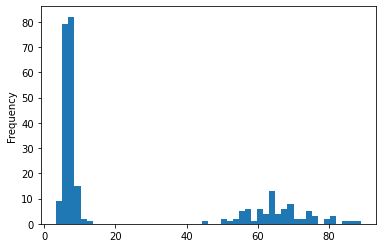

In [113]:
#se puede separar esta gráfica como por rangos? ver un pedacito y luego otro pedacito
df['protein'].plot(kind = 'hist', bins = 50)

<AxesSubplot:xlabel='protein', ylabel='Count'>

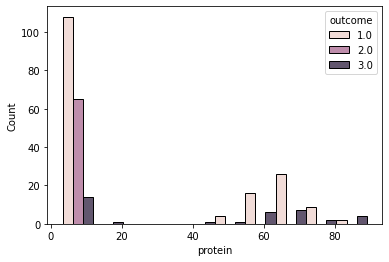

In [114]:
sns.histplot(data = df, x = 'protein', hue = 'outcome', multiple = 'dodge')

In [115]:
df[df['protein']> 40] #loc iloc

,surgery,age,hospital_number,r_temperature,pulse,resp_rate,ext_temperature,per_pulse,muc_membraes,cap_ref_time,...,abd_appearance,abd_protein,outcome,surgical_lesion,type_lesion_1,type_lesion_2,type_lesion_3,cp_data,extra,extra-muc_membraes
1,1.0,Adult,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,2.0,2.0,3.0,2,2208,0,0,2,NaN,None
14,1.0,Adult,534917,38.2,76.0,28.0,NaN,NaN,1.0,1.0,...,1.0,2.0,1.0,1,2112,0,0,2,NaN,None
23,1.0,Young,534998,38.3,130.0,60.0,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,1,3111,0,0,2,NaN,None
24,1.0,Adult,533692,38.1,60.0,12.0,NaN,NaN,3.0,1.0,...,NaN,NaN,1.0,1,3111,0,0,2,NaN,None
29,2.0,Adult,535415,37.7,48.0,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,1.0,2,0,0,0,2,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2.0,Adult,535054,38.6,45.0,16.0,NaN,NaN,2.0,1.0,...,NaN,NaN,1.0,2,0,0,0,2,NaN,None
293,1.0,Adult,534004,NaN,78.0,24.0,NaN,NaN,3.0,1.0,...,NaN,2.0,3.0,2,2209,0,0,2,NaN,None
294,2.0,Adult,533902,38.5,40.0,16.0,NaN,NaN,1.0,1.0,...,NaN,NaN,1.0,2,0,0,0,2,NaN,None
295,1.0,Adult,533886,NaN,120.0,70.0,NaN,NaN,4.0,2.0,...,NaN,NaN,3.0,2,3205,0,0,2,NaN,None


<AxesSubplot:xlabel='protein', ylabel='Count'>

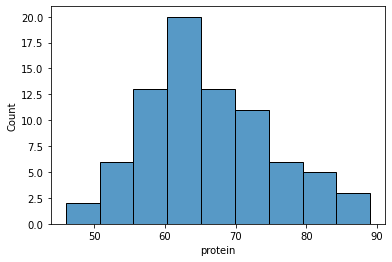

In [116]:
sns.histplot(data = df[df['protein']> 40], x = 'protein')

<AxesSubplot:>

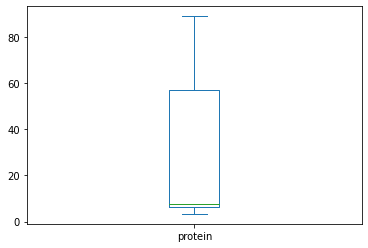

In [117]:
#según esto no hay datos atípicos
df['protein'].plot(kind = 'box')

In [118]:
df['abd_appearance'].unique()

array([nan,  2.,  3.,  1.])

In [119]:
#               1 = clear
#               2 = cloudy
#               3 = serosanguinous
#normal fluid is clear while cloudy or serosanguinous indicates a compromised gut
#De acuerdo con lo anterior, entonces debe haber una relación entre los números 3 y los que tienen peristalsis y abdominal distension
#más o menos relacionados
df[['abd_appearance']].value_counts()

abd_appearance
2.0               48
3.0               46
1.0               41
dtype: int64

In [120]:
df['abd_appearance'] = df['abd_appearance'].where(df['abd_appearance'] != '?', other = np.nan)

In [121]:
#the higher the level of protein the more likely it is to have a compromised gut.
df['abd_protein'].unique()

array([ nan,  2. ,  5.3,  2.2,  3.6,  4.7,  3.9,  1.3,  7.4,  6.6,  1. ,
        5. ,  0.1,  4.1,  1.6,  4.5,  6. ,  7. ,  2.6,  1.4,  2.3,  3.7,
        2.8, 10. ,  2.9,  5.2,  4.3,  3.4,  3. , 10.1,  1.5,  2.1,  8. ,
        4.8,  3.2,  4.4,  2.5,  3.3])

In [122]:
df[['abd_protein']].value_counts()

abd_protein
2.0            26
1.0            17
2.6             4
3.9             4
3.6             3
3.4             3
5.0             3
2.8             3
7.0             3
2.3             2
6.0             2
4.5             2
5.3             2
3.0             2
1.6             2
4.1             2
4.3             2
6.6             1
5.2             1
7.4             1
8.0             1
4.8             1
10.0            1
4.7             1
0.1             1
4.4             1
3.7             1
3.3             1
3.2             1
2.9             1
2.5             1
2.2             1
2.1             1
1.5             1
1.4             1
1.3             1
10.1            1
dtype: int64

In [123]:
df['abd_protein'] = df['abd_protein'].where(df['abd_protein'] != '?', other = np.nan)

In [124]:
typos_col = {
    'abd_protein': 'float64'
}


In [125]:
df = df.astype(typos_col)

<AxesSubplot:ylabel='Frequency'>

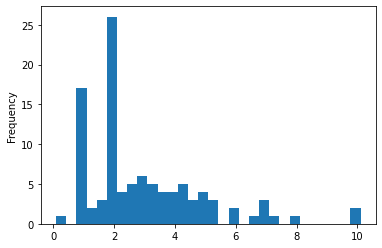

In [126]:
df['abd_protein'].plot(kind = 'hist', bins = 30)

<AxesSubplot:>

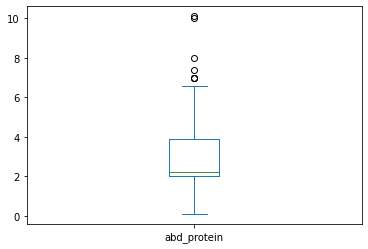

In [127]:
df['abd_protein'].plot(kind = 'box')

In [128]:
df['outcome'].unique()

array([ 2.,  3.,  1., nan])

In [129]:
#               1 = lived
#               2 = died
#               3 = was euthanized
df[['outcome']].value_counts()

outcome
1.0        178
2.0         77
3.0         44
dtype: int64

In [130]:
df['outcome'] = df['outcome'].where(df['outcome'] != '?', other = np.nan)

In [131]:
#directamente relacionada con la variable abdomen. (importante)
df['surgical_lesion'].unique()

array([2, 1])

In [132]:
df[['surgical_lesion']].value_counts()

surgical_lesion
1                  191
2                  109
dtype: int64

In [133]:
df['surgical_lesion'] = df[['surgical_lesion']].applymap(lambda x: True if x== 1 else False)

In [134]:
df[['surgical_lesion']].value_counts()

surgical_lesion
True               191
False              109
dtype: int64

In [135]:
df['type_lesion_1'].unique()

array([11300,  2208,     0,  4300,  3124,  3205,  2124,  2111,  4124,
        2112,  3207,  1400,  4205,  3111,  4122,  2207,  2209,  1124,
        7111,  5205,  2113,  9400,  2305,  7209,  7400,  3112,  3209,
        2322, 11124,  3025,  2205,  5206,   400,  5000,  5400, 31110,
        2206,  5124,  7113,  6209,  3400,  6112,  6111,  1111,  2300,
       21110,  4111,  3133,  5111,   300,  3115,  9000,  3300,  3113,
       41110, 11400, 12208,  4206,  4207,  8300,  8400])

In [136]:
df['type_lesion_1'].nunique()

61

In [137]:
df[['type_lesion_1']].value_counts()

type_lesion_1
0                56
3111             33
3205             29
2208             20
2205             13
                 ..
300               1
4122              1
4206              1
4207              1
41110             1
Length: 61, dtype: int64

In [138]:
df['type_lesion_2'].unique()

array([   0, 1400, 7111, 3111, 6112, 3112])

In [139]:
df[['type_lesion_2']].value_counts()

type_lesion_2
0                293
3111               3
1400               1
3112               1
6112               1
7111               1
dtype: int64

In [140]:
df['type_lesion_3'].unique()

array([   0, 2209])

In [141]:
df[['type_lesion_3']].value_counts()

type_lesion_3
0                299
2209               1
dtype: int64

In [142]:
typos_col = {
    'type_lesion_1': 'object', 
    'type_lesion_2': 'object', 
    'type_lesion_3': 'object', 
}

In [143]:
df = df.astype(typos_col)

In [144]:
df.dtypes

surgery               float64
age                    object
hospital_number         int64
r_temperature         float64
pulse                 float64
resp_rate             float64
ext_temperature        object
per_pulse              object
muc_membraes          float64
cap_ref_time          float64
pain                   object
peristalsis           float64
abd_distension        float64
naso_tub              float64
naso_reflux           float64
naso_reflux_ph        float64
rect_exam             float64
abdomen               float64
pack_cell_vol         float64
protein               float64
abd_appearance        float64
abd_protein           float64
outcome               float64
surgical_lesion          bool
type_lesion_1          object
type_lesion_2          object
type_lesion_3          object
cp_data                 int64
extra                 float64
extra-muc_membraes     object
dtype: object

In [145]:
df = df.drop('extra', axis = 1)

In [146]:
df

,surgery,age,hospital_number,r_temperature,pulse,resp_rate,ext_temperature,per_pulse,muc_membraes,cap_ref_time,...,protein,abd_appearance,abd_protein,outcome,surgical_lesion,type_lesion_1,type_lesion_2,type_lesion_3,cp_data,extra-muc_membraes
0,2.0,Adult,530101,38.5,66.0,28.0,NaN,NaN,NaN,2.0,...,8.4,NaN,NaN,2.0,False,11300,0,0,2,None
1,1.0,Adult,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,85.0,2.0,2.0,3.0,False,2208,0,0,2,None
2,2.0,Adult,530334,38.3,40.0,24.0,NaN,NaN,3.0,1.0,...,6.7,NaN,NaN,1.0,False,0,0,0,1,None
3,1.0,Young,5290409,39.1,164.0,84.0,NaN,NaN,6.0,2.0,...,7.2,3.0,5.3,2.0,True,2208,0,0,1,None
4,2.0,Adult,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,7.4,NaN,NaN,2.0,False,4300,0,0,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,Adult,533886,NaN,120.0,70.0,NaN,NaN,4.0,2.0,...,65.0,NaN,NaN,3.0,False,3205,0,0,2,None
296,2.0,Adult,527702,37.2,72.0,24.0,NaN,NaN,4.0,2.0,...,NaN,3.0,3.3,3.0,True,2208,0,0,1,None
297,1.0,Adult,529386,37.5,72.0,30.0,NaN,NaN,4.0,1.0,...,6.8,NaN,NaN,2.0,True,3205,0,0,2,None
298,1.0,Adult,530612,36.5,100.0,24.0,NaN,NaN,3.0,1.0,...,6.0,3.0,3.4,1.0,True,2208,0,0,1,None


In [21]:
#esta transformación elimina los valores desconocidos, así que ojo
df['surgery'] = df[['surgery']].applymap(lambda x: True if x== 1 else False)

In [29]:
df['circulation_state'] = df[['cap_ref_time']].applymap(lambda x: 'Good' if x== '1' else 'Poor')

In [30]:
df['Likely_require_surgery'] = df[['pain']].applymap(lambda x: True if x>='3' else False)

In [31]:
#naso_reflux_dict = {
  #  '1': 'None',
   # '2': 'High',
    #'3': 'Low',
#}

In [32]:
#df['Obstruction_Likelihood'] = df['naso_reflux'].map(naso_reflux_dict)

In [33]:
df

,surgery,age,hospital_number,r_temperature,pulse,resp_rate,ext_temperature,per_pulse,muc_membraes,cap_ref_time,...,abd_protein,outcome,surgical_lesion,type_lesion_1,type_lesion_2,type_lesion_3,cp_data,extra-muc_membraes,circulation_state,Likely_require_surgery
0,False,Adult,530101,38.5,66.0,28.0,cool,reduced,?,2,...,?,2,2,11300,0,0,2,NaN,Poor,True
1,False,Adult,534817,39.2,88.0,20.0,NaN,NaN,4,1,...,2,3,2,2208,0,0,2,serious circulatory compromise,Good,True
2,False,Adult,530334,38.3,40.0,24.0,normal,normal,3,1,...,?,1,2,0,0,0,1,early chock,Good,True
3,False,Young,5290409,39.1,164.0,84.0,cold,normal,6,2,...,5.30,2,1,2208,0,0,1,serious circulatory compromise,Poor,False
4,False,Adult,530255,37.3,104.0,35.0,NaN,NaN,6,2,...,?,2,2,4300,0,0,2,serious circulatory compromise,Poor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,Adult,533886,NaN,120.0,70.0,cold,NaN,4,2,...,?,3,2,3205,0,0,2,serious circulatory compromise,Poor,False
296,False,Adult,527702,37.2,72.0,24.0,cool,increased,4,2,...,3.30,3,1,2208,0,0,1,serious circulatory compromise,Poor,True
297,False,Adult,529386,37.5,72.0,30.0,cold,reduced,4,1,...,?,2,1,3205,0,0,2,serious circulatory compromise,Good,True
298,False,Adult,530612,36.5,100.0,24.0,cool,reduced,3,1,...,3.40,1,1,2208,0,0,1,early chock,Good,True
